# 导入用到的包

In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd
import platform

from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager
# a high-level Python data visualization library based on matplotlib.
import seaborn as sns
from matplotlib.pyplot import cm
%matplotlib inline
%matplotlib notebook


#显示中文问题
if platform.system() == "Darwin":
    # 简易设置以让matplotlib能显示中文
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
elif platform.system() == "Windows":
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 简易设置以让matplotlib能显示中文
elif platform.system() == 'Linux': # in our case, using Gitpod cloud IDE
    font_dirs = ["./Fonts/"]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #简易设置以让matplotlib能显示中文

In [2]:
print(platform.system())

Linux


# 加载titanic 数据

In [3]:
df = pd.read_csv('./titanic_all.csv') #读取数据

# 定义统计量为从中抽取10次的平均费用，考察其抽样分布的特征

In [4]:
fare = df['Fare'].dropna() #选择费用数据，并去掉缺失值b
np.mean(fare)

33.29547928134557

<IPython.core.display.Javascript object>


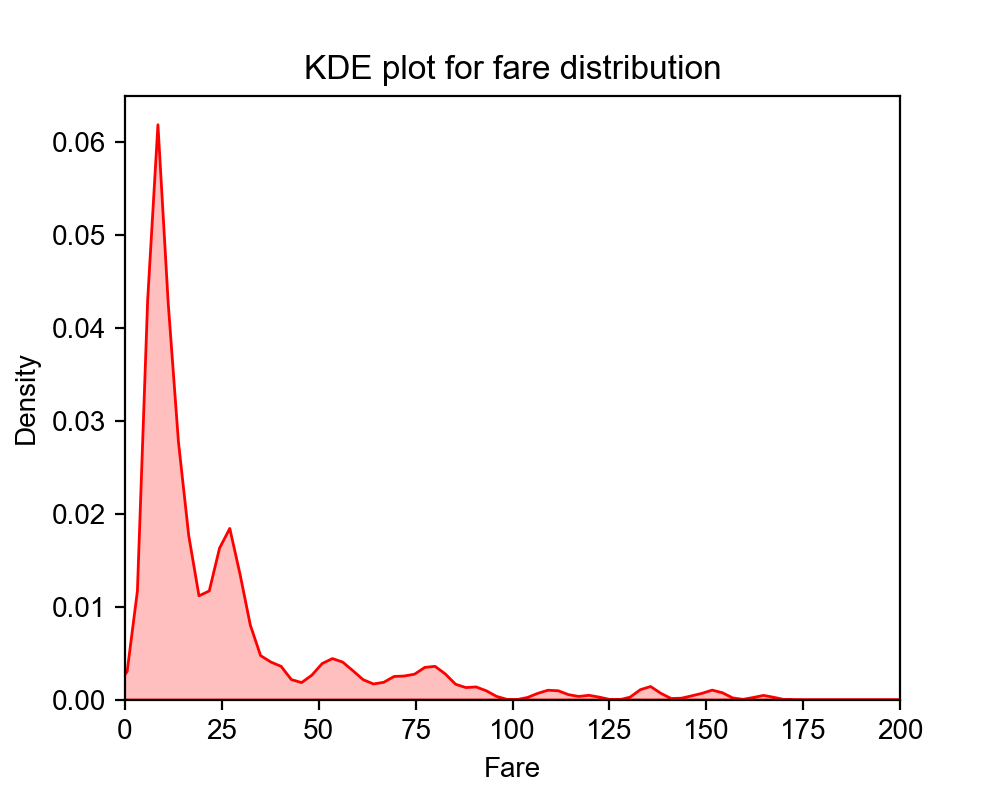

In [5]:
# 先看下fare的分布
figure,ax = plt.subplots(figsize=(5,4),dpi=100)
_ = sns.kdeplot(fare,color='r',shade=True,bw_adjust=0.2) # bw_adjust是smoothing的参数，越大越平滑
_ = plt.title("KDE plot for fare distribution")
_ = ax.set_xlim(0,200)

In [6]:
#np.random.choice 能够随机选取fare中的n个值, 默认状态下为有放回。
np.random.choice(fare,10) #n=10

array([ 13.    ,   0.    ,   7.225 ,   0.    ,  12.275 ,  16.1   ,
         7.1417,  14.4542, 133.65  ,   6.4958])

- 每次抽取10个样本计算均值,循环10000次，查看抽样分布的特征

<IPython.core.display.Javascript object>


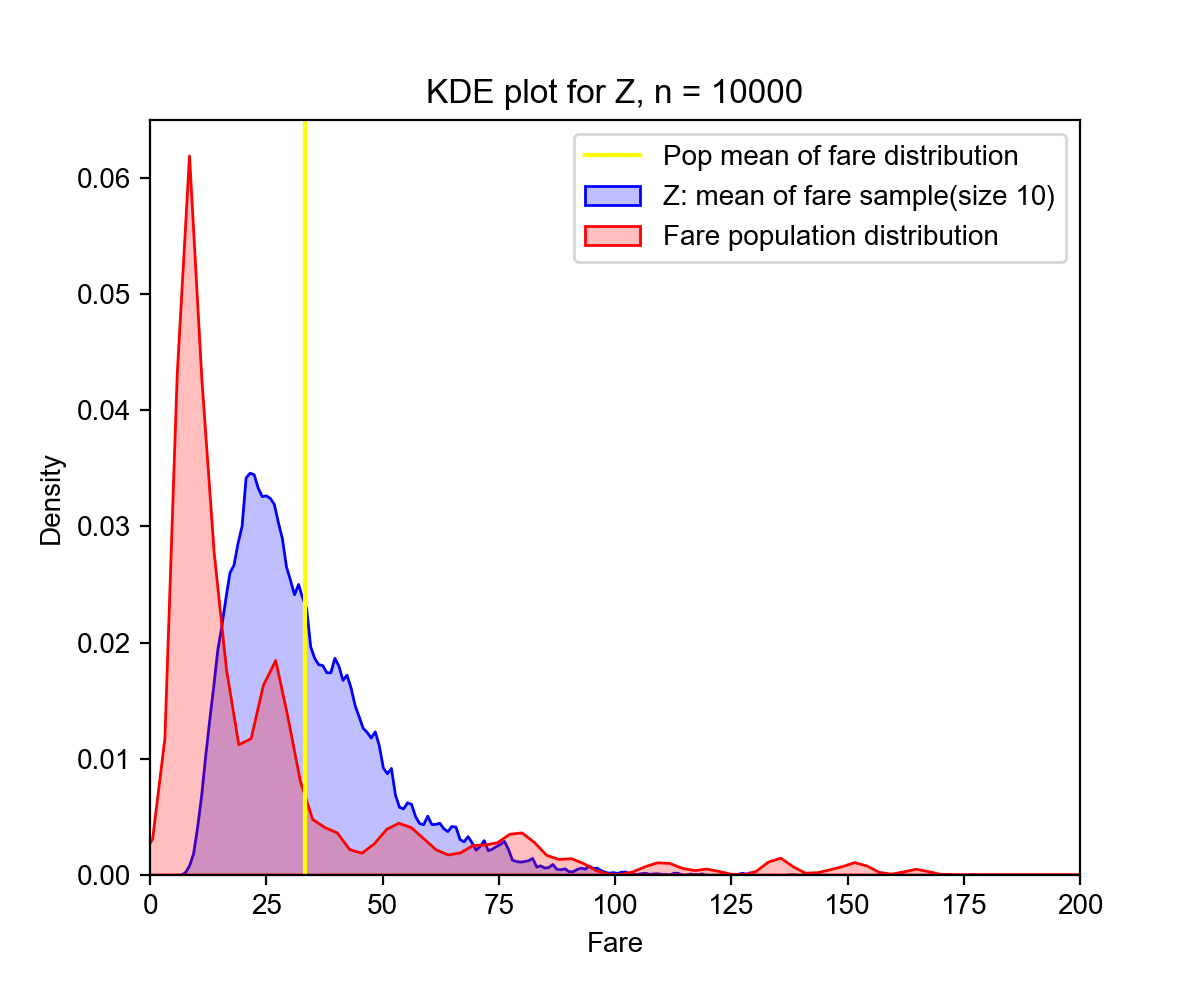

In [7]:
Z = []
n=10000
for i in range(n):
    z = np.mean(np.random.choice(fare,10)) #每次抽样，都计算下Z统计量
    Z.append(z) #把该次获得的统计量添加到一个list中
    
#因为是连续变量，用KDE plot来展示该统计量的分布的特征

figure,ax = plt.subplots(figsize=(6,5),dpi=100)
_ = sns.kdeplot(Z,color='b',shade=True,bw_adjust=0.2,label='Z: mean of fare sample(size 10)') # bw_adjust是smoothing的参数，越大越平滑
_ = sns.kdeplot(fare,color='r',shade=True,bw_adjust=0.2,label='Fare population distribution') # bw_adjust是smoothing的参数，越大越平滑
plt.axvline(x=np.mean(fare),color='yellow',label='Pop mean of fare distribution')
plt.legend(loc=1)
plt.title("KDE plot for Z, n = %s" %(n))
_ = ax.set_xlim(0,200)


- 每次抽取100个样本计算均值,循环10000次，查看抽样分布的特征

<IPython.core.display.Javascript object>


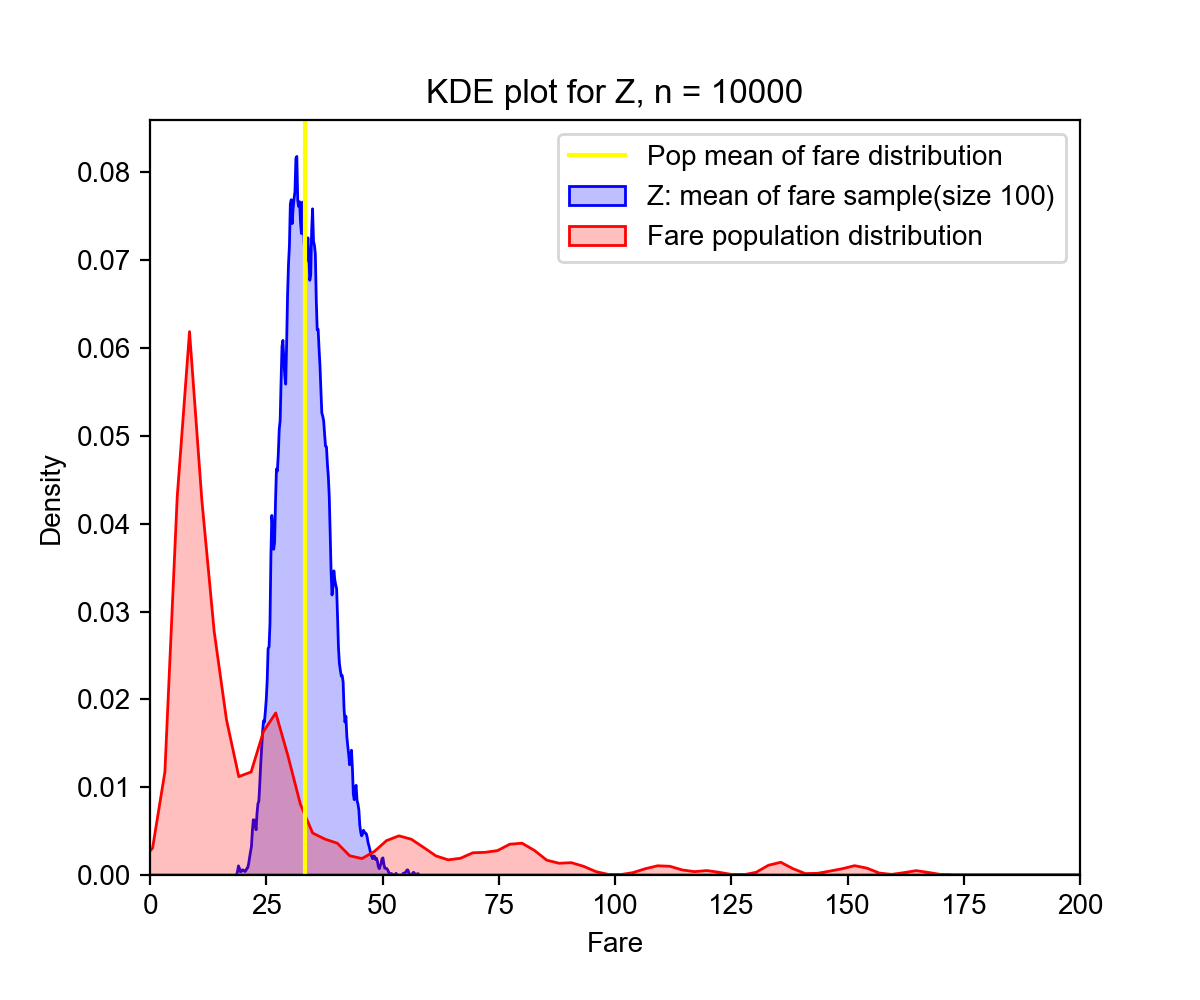

In [8]:
Z = []
n=10000
for i in range(n):
    z = np.mean(np.random.choice(fare,100)) #每次抽样，都计算下Z统计量
    Z.append(z) #把该次获得的统计量添加到一个list中
    
#因为是连续变量，用KDE plot来展示该统计量的分布的特征

figure,ax = plt.subplots(figsize=(6,5),dpi=100)

_ = sns.kdeplot(Z,color='b',shade=True,bw_adjust=0.2,label='Z: mean of fare sample(size 100)') # bw_adjust是smoothing的参数，越大越平滑
_ = sns.kdeplot(fare,color='r',shade=True,bw_adjust=0.2,label='Fare population distribution') # bw_adjust是smoothing的参数，越大越平滑
plt.axvline(x=np.mean(fare),color='yellow',label='Pop mean of fare distribution')
plt.legend(loc=1)
plt.title("KDE plot for Z, n = %s" %(n))
_ = ax.set_xlim(0,200)

- 每次抽取1000个样本计算均值,循环10000次，查看抽样分布的特征

<IPython.core.display.Javascript object>


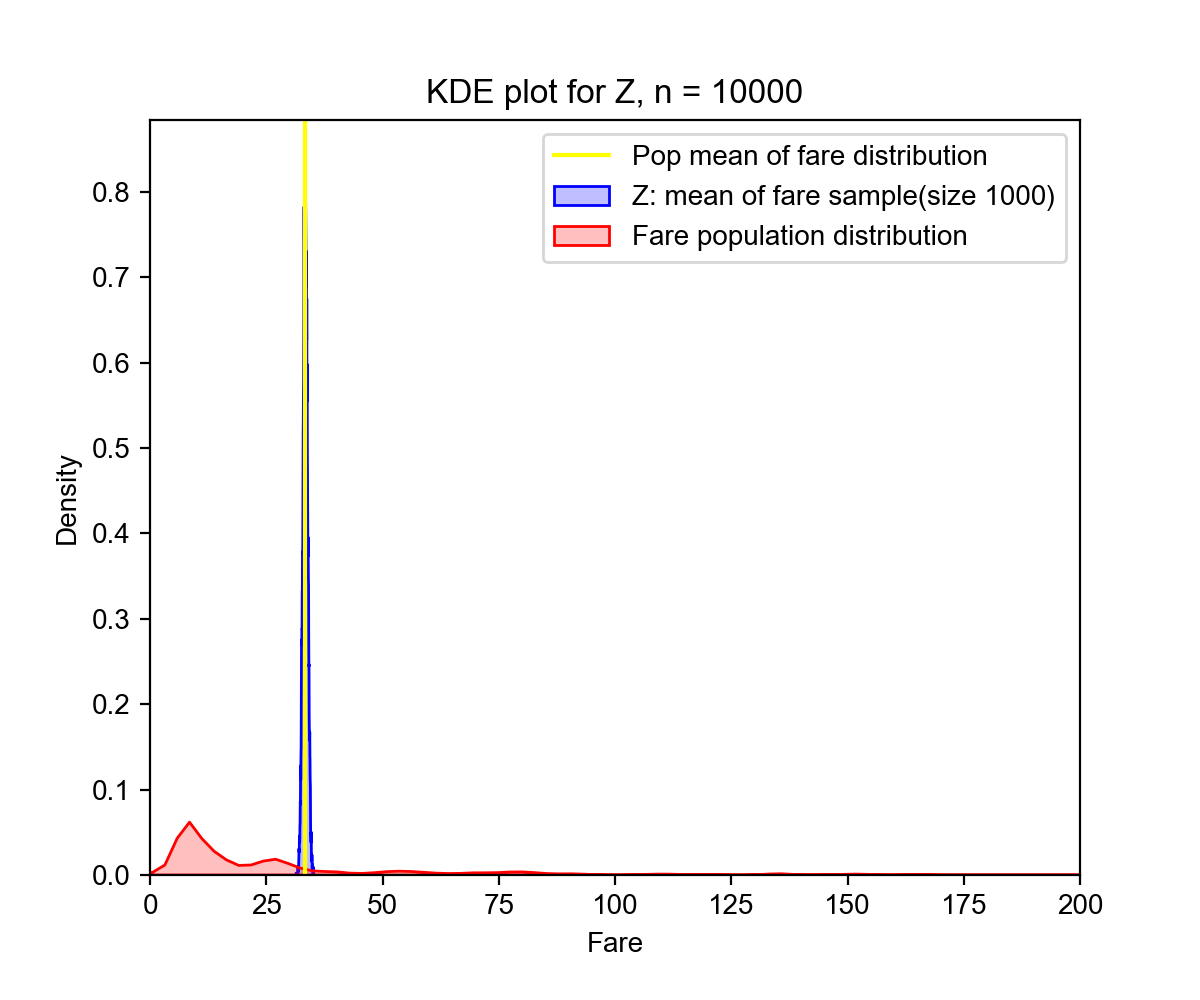

In [9]:
Z = []
n=10000
for i in range(n):
    z = np.mean(np.random.choice(fare,10000)) #每次抽样，都计算下Z统计量
    Z.append(z) #把该次获得的统计量添加到一个list中
    
#因为是连续变量，用KDE plot来展示该统计量的分布的特征

figure,ax = plt.subplots(figsize=(6,5),dpi=100)

_ = sns.kdeplot(Z,color='b',shade=True,bw_adjust=0.2,label='Z: mean of fare sample(size 1000)') # bw_adjust是smoothing的参数，越大越平滑
_ = sns.kdeplot(fare,color='r',shade=True,bw_adjust=0.2,label='Fare population distribution') # bw_adjust是smoothing的参数，越大越平滑
plt.axvline(x=np.mean(fare),color='yellow',label='Pop mean of fare distribution')
plt.legend(loc=1)
plt.title("KDE plot for Z, n = %s" %(n))
_ = ax.set_xlim(0,200)

# 练习 ，避免代码重复，把上面的功能放到一个函数里

In [10]:
def sampleDistributionPlot(n,samplesize):
    Z = []
    for i in range(n):
        z = np.mean(np.random.choice(fare,samplesize)) #每次抽样，都计算下Z统计量
        Z.append(z) #把该次获得的统计量添加到一个list中

    #因为是连续变量，用KDE plot来展示该统计量的分布的特征
    figure,ax = plt.subplots(figsize=(6,5),dpi=100)
    
    _ = sns.kdeplot(Z,color='b',shade=True,bw_adjust=0.2,label='Z: mean of fare sample(size %s)'%(samplesize)) # bw_adjust是smoothing的参数，越大越平滑
    _ = sns.kdeplot(fare,color='r',shade=True,bw_adjust=0.2,label='Fare population distribution') # bw_adjust是smoothing的参数，越大越平滑
    plt.axvline(x=np.mean(fare),color='yellow',label='Pop mean of fare distribution')
    plt.legend(loc=1)
    plt.title("KDE plot for Z, n = %s" %(n))
    _ = ax.set_xlim(0,200)

<IPython.core.display.Javascript object>


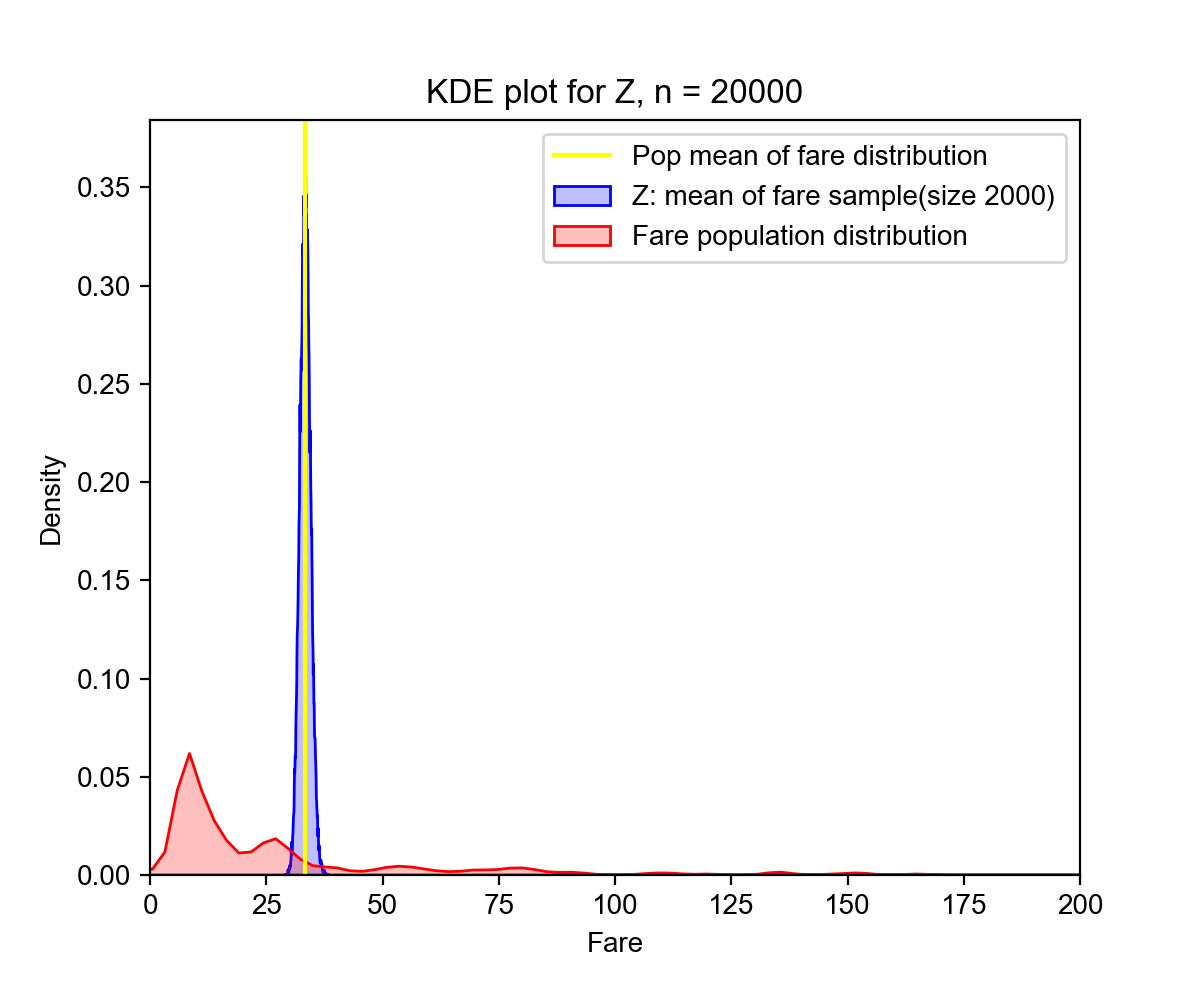

In [11]:
sampleDistributionPlot(n=20000,samplesize=2000) #尝试变化实验的重复次数 n 和 每次抽样的samplesize

## 让samplesize变化，看均值统计量的分布特征的变化。

In [12]:
from matplotlib.animation import FuncAnimation #引入动画包

In [13]:
def animate(samplesize): #定义每一帧(frame)的画法，随着帧数，变换samplesize的大小
    Z = []
    for i in range(10000):
        z = np.mean(np.random.choice(fare,samplesize)) #每次抽样，都计算下Z统计量
        Z.append(z) #把该次获得的统计量添加到一个list中
    figure.clear()
    line = sns.kdeplot(Z,color='b',shade=True,bw_adjust=0.2,label='Z: mean(sample size =%s)'%(samplesize)) # bw_adjust是smoothing的参数，越大越平滑
    plt.axvline(x=np.mean(fare),color='yellow',label='Population mean')
    plt.legend(loc=5,fontsize=13)
    plt.title("KDE plot for Z, n = %s" %(n),fontsize=15)


<IPython.core.display.Javascript object>


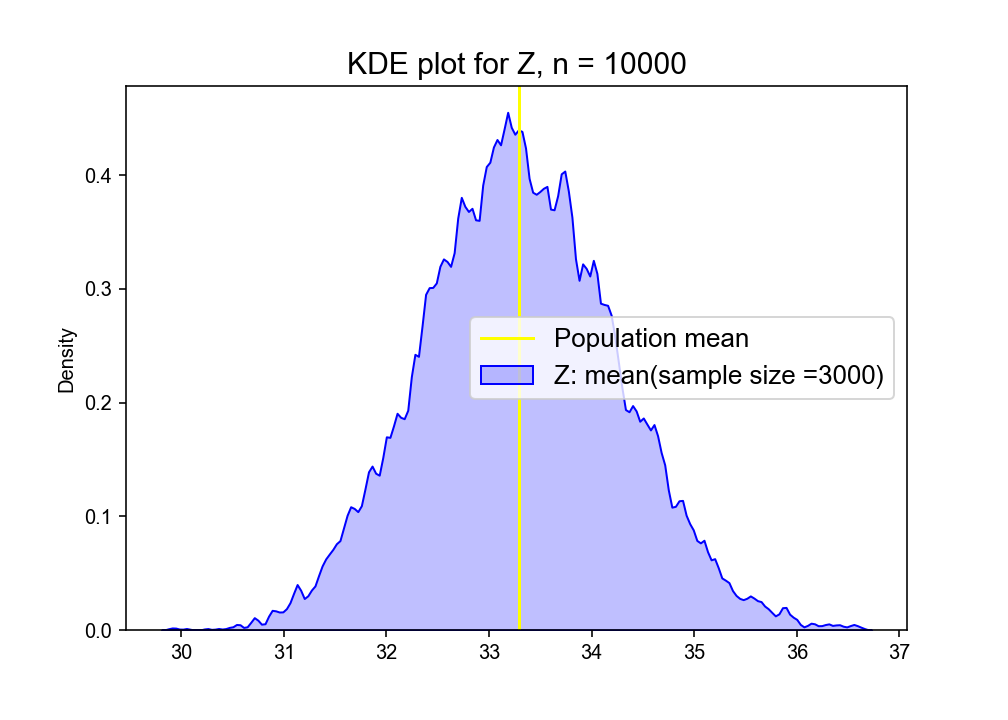

In [14]:
# 动画效果
figure= plt.figure(figsize=(7,5))

frames = [2,3,5,10,20,30,50,100,200,500,1000,2000,3000,4000,5000,6000,10000] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animate, frames=frames,interval=1200,repeat=False,blit=True)
plt.show()

# 样本均值和样本方差统计量的计算方法(numpy)
- S = [x1,x2,x3,....]
- np.mean(S)
- np.var(S,ddof=1)            
    - ddof 考虑到了自由度，在样本够大的情况下，可以不设定

# 中心极限定理初步: Galton board，杨辉三角 与二项分布的正态近似

In [15]:
from IPython.display import IFrame

In [ ]:
%%html
<iframe src="https://www.bilibili.com/video/BV1kv411r7UD/?spm_id_from=333.788.recommend_more_video.5" width="850" height="600"></iframe>


# 卷积(convolution)

In [16]:
def convolution(pmf1,conv_pmf):
    return signal.fftconvolve(pmf1,conv_pmf,'same')

def convolution2(pmf1,conv_pmf):
    return signal.fftconvolve(pmf1,conv_pmf,'full')


def animateConvolution(i,fit=True,pdf=True,same=True): #定义每一帧(frame)的画法，随着帧数，变换samplesize的大小
    conv_pmf = pmf1
    for k in range(i):
        if same:
            conv_pmf = convolution(pmf1,conv_pmf) 
        else:
            conv_pmf = convolution2(pmf1,conv_pmf)
    
    figure.clear()
    if pdf:
        conv_pmf = conv_pmf/delta
    temp = dict(zip(big_grid,conv_pmf))
    x,y = list(zip(*[(k,v) for k,v in temp.items() if v>1e-6]))
    
    alpha=0.8
    color='red'
    width=5
    if pdf:
        color='orange'
        width=13
    plt.plot(x,y, 'o-',color=color,markersize=6,linewidth=width,alpha=alpha,label="Convolution")
    
    
    #provide a normal distribution fit for comparison
    if fit:
        x = np.array(x)
        y = np.array(y)
        if pdf:
            y = y*delta
        mu = np.dot(x,y)
        sigma = np.sqrt(np.dot(np.power(x-mu,2),y))
        
        norm_x = np.linspace(np.min(x),np.max(x),100)
        norm_fit = sp.stats.norm.pdf(norm_x,loc=mu,scale=sigma)
        plt.plot(norm_x,norm_fit, '-',linewidth=8,color='b',alpha=0.5,label='Normal')

    

    plt.legend(loc=1,fontsize=13)
    plt.title("convolutions=%d" %(i+1),fontsize=15)

- 例1: x 只取两个值
    -   = 1  p=0.9 
    -   = 2  p=0.1

<IPython.core.display.Javascript object>


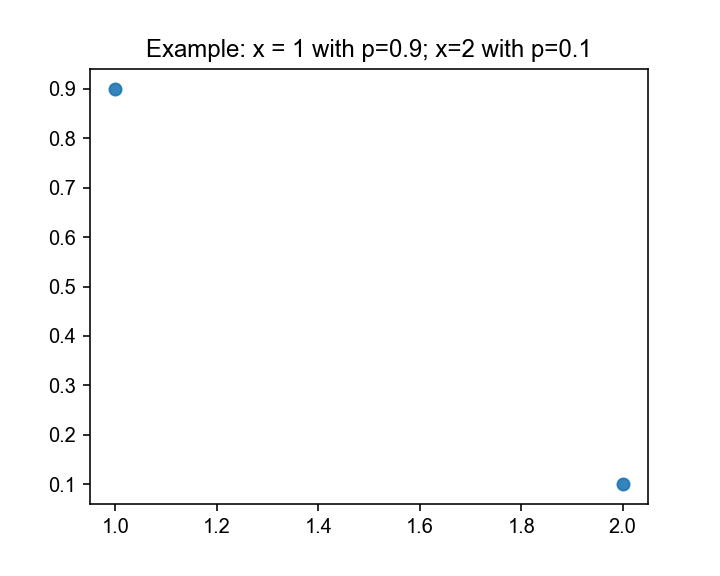

In [17]:

f1 = lambda t: (np.abs(t-1.0)<1e-5)*0.9 +(np.abs(t-2.0)<1e-5)*0.1 

fig = plt.figure(figsize=[5,4])
delta = 1e-2
big_grid = np.arange(-100,100,delta)
pmf1 = f1(big_grid)
temp = dict(zip(big_grid,pmf1))
x,y = list(zip(*[(k,v) for k,v in temp.items() if v>1e-4]))
plt.plot(x, y,'o',alpha=0.9,label=str(i+1))
plt.title("Example: x = 1 with p=0.9; x=2 with p=0.1")
plt.show()

<IPython.core.display.Javascript object>


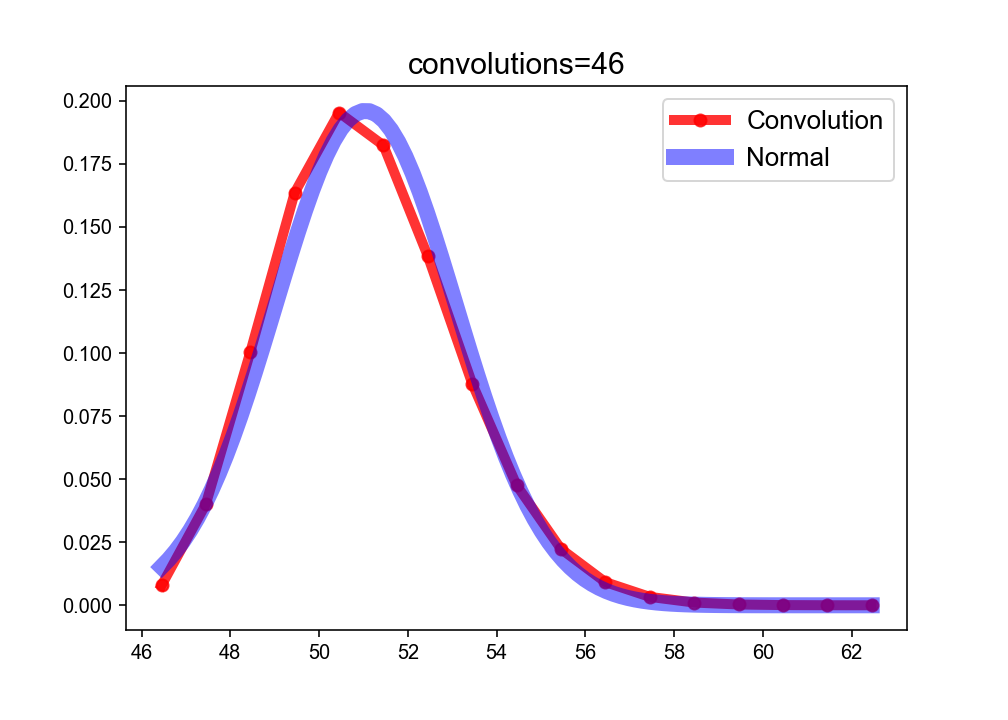

In [18]:
delta = 1e-2
big_grid = np.arange(-250,250,delta)
pmf1 = f1(big_grid)

figure = plt.figure(figsize=[7,5])
frames = [i for i in range(1,80)] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animateConvolution, frames=frames,interval=550,fargs=(True,False),repeat=False,blit=True)
plt.show()

- 例子2： x is uniform distribution
    - x ~ [2,5]

<IPython.core.display.Javascript object>


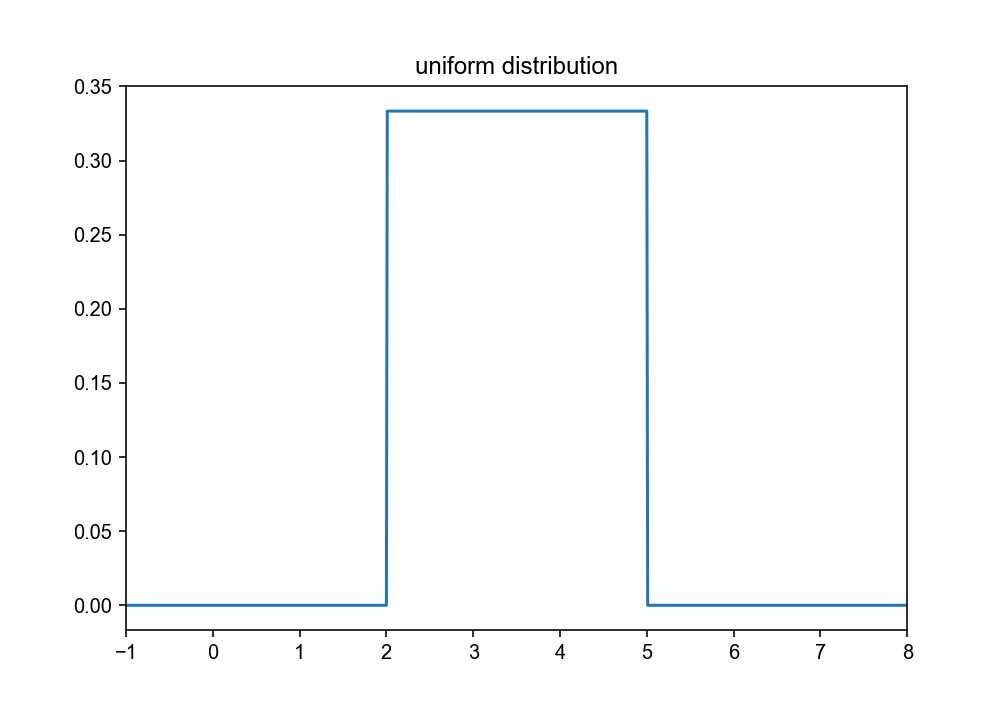

In [19]:
uniform_dist = sp.stats.uniform(loc=2, scale=3)
delta = 1e-2
big_grid = np.arange(-200,200,delta)
pmf1 = uniform_dist.pdf(big_grid)*delta

fig = plt.figure(figsize=[7,5])
plt.plot(big_grid,pmf1/delta)
plt.xlim(-1,8)
plt.title("uniform distribution")
plt.show()

<IPython.core.display.Javascript object>


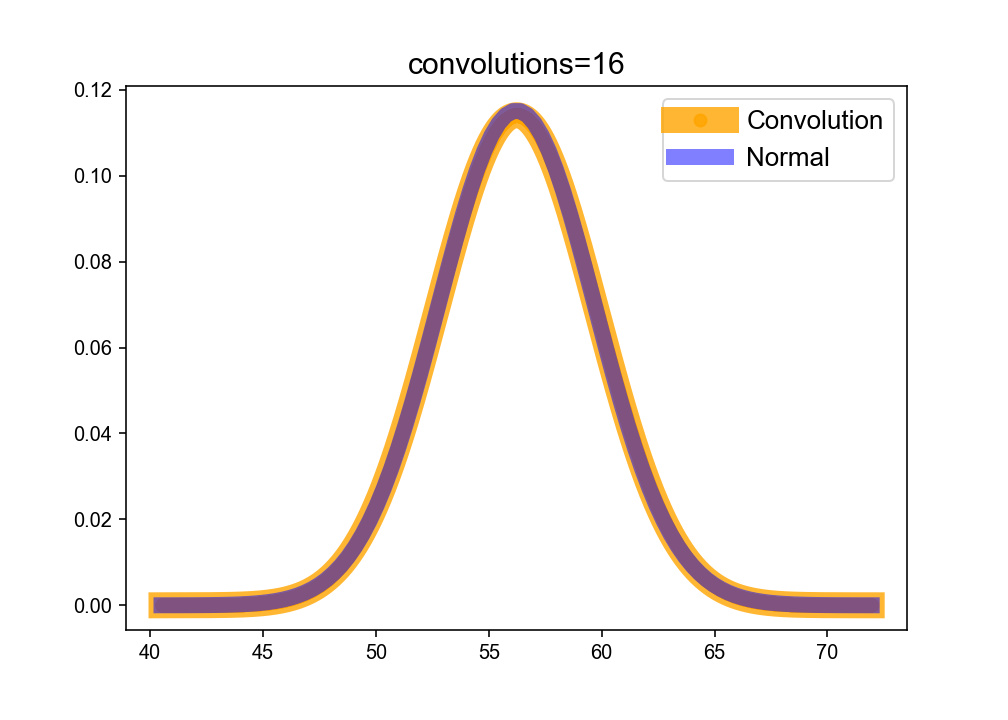

In [20]:
uniform_dist = sp.stats.uniform(loc=2, scale=3)
delta = 1e-2
big_grid = np.arange(-250,250,delta)
pmf1 = uniform_dist.pdf(big_grid)*delta

figure = plt.figure(figsize=[7,5])
frames = [i for i in range(1,20)] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animateConvolution, frames=frames,fargs=(True,True,),interval=250,repeat=False,blit=True)
plt.show()

- 例子3: Poisson distribution with $\lambda =1$

<IPython.core.display.Javascript object>


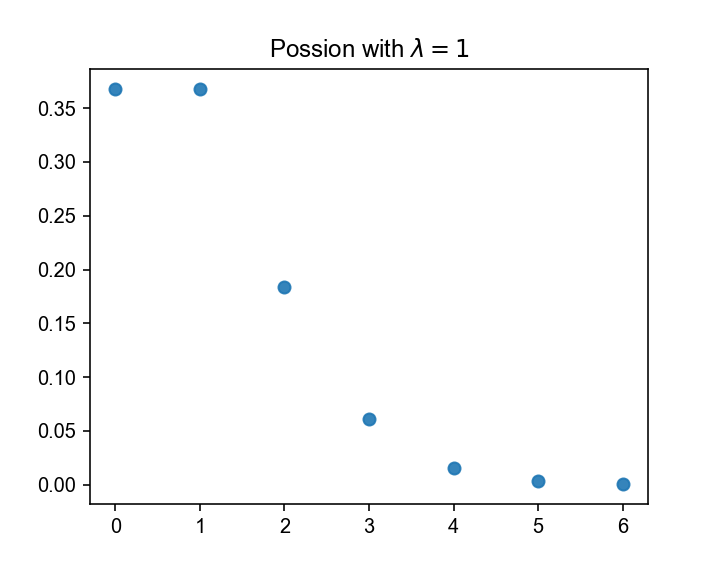

In [21]:
delta = 1e-2
big_grid = np.arange(0,200,delta)
lambda_=1
pmf1 = sp.stats.poisson.pmf(big_grid,lambda_)

fig = plt.figure(figsize=[5,4])
temp = dict(zip(big_grid,pmf1))
x,y = list(zip(*[(k,v) for k,v in temp.items() if v>1e-4]))
plt.plot(x, y,'o',alpha=0.9,label=str(i+1))
plt.title("Possion with $\lambda = %s $"%(lambda_))
plt.show()

<IPython.core.display.Javascript object>


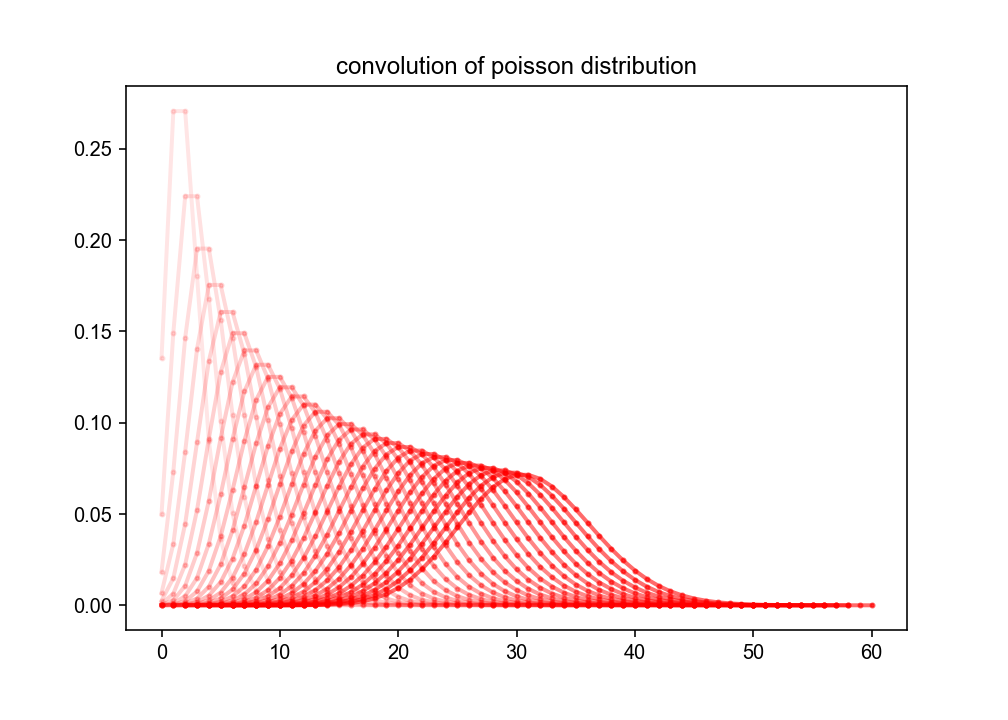

In [22]:
conv_pmf = pmf1
figure = plt.figure(figsize=[7,5])
for k in range(30):
    conv_pmf = convolution2(pmf1,conv_pmf)
    
    temp = dict(zip(big_grid,conv_pmf))
    x,y = list(zip(*[(k,v) for k,v in temp.items() if v>1e-6]))

    alpha=0.1
    color='red'
    width=2
    plt.plot(x,y, 'o-',color=color,markersize=2,linewidth=width,alpha=alpha+k/60,label="Convolution")
plt.title("convolution of poisson distribution")
plt.show()

<IPython.core.display.Javascript object>


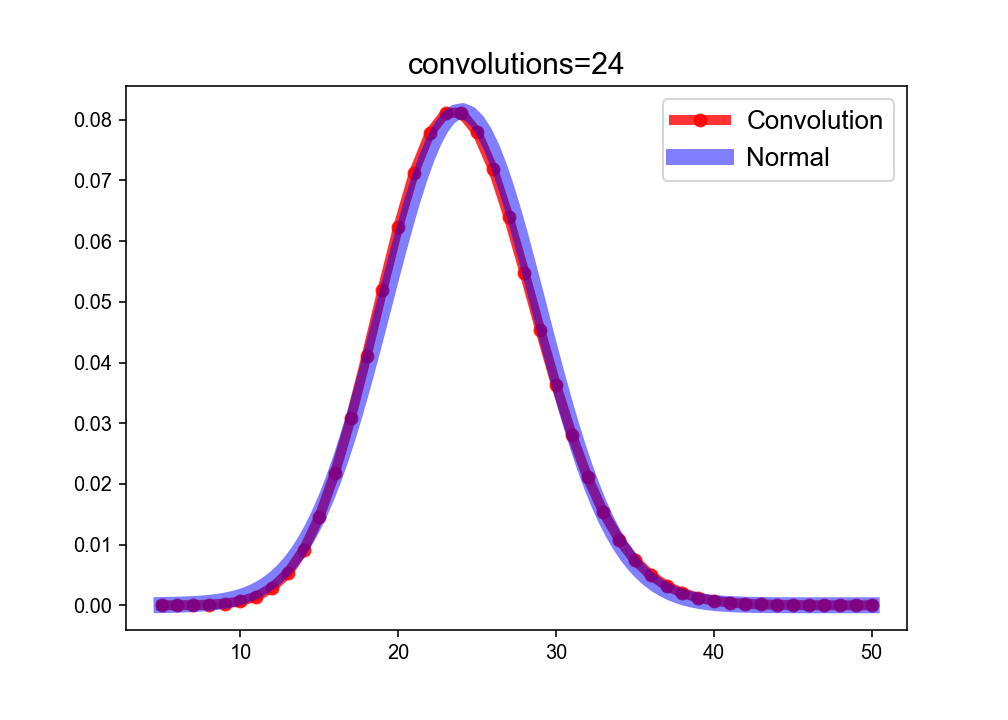

In [23]:
# covolution of possion
delta = 1e-2
big_grid = np.arange(0,200,delta)
pmf1 = sp.stats.poisson.pmf(big_grid,1)

figure = plt.figure(figsize=[7,5])
frames = [i for i in range(1,30)] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animateConvolution, frames=frames,interval=450,fargs=(True,False,False,),repeat=False,blit=True)
plt.show()

- 例子4: beta distribution (5,1)

<IPython.core.display.Javascript object>


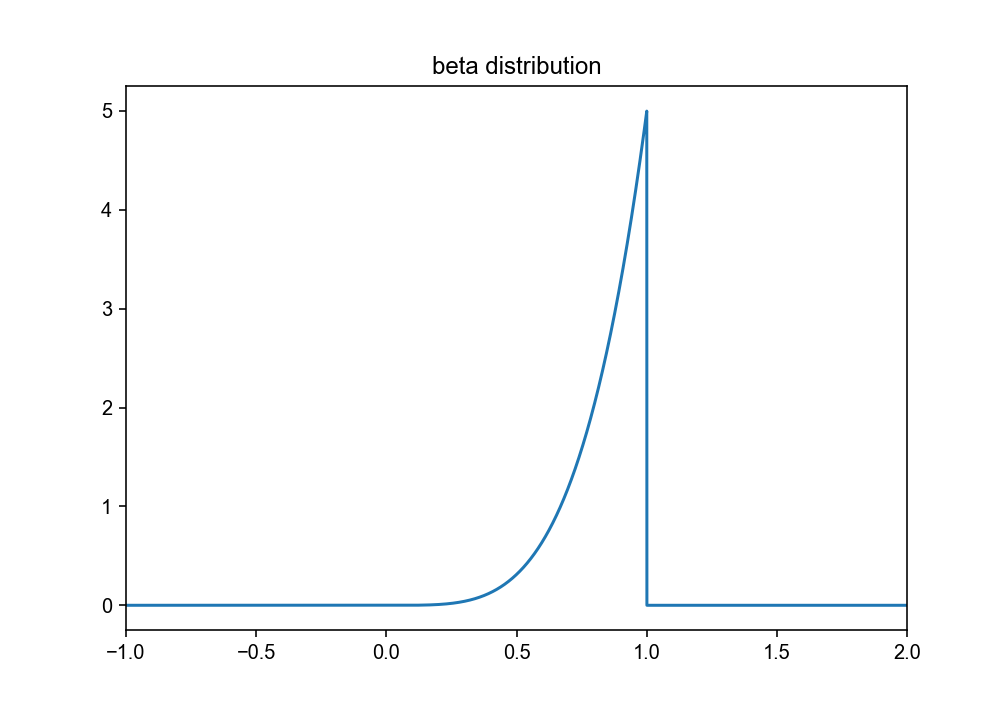

In [24]:
delta = 1e-4
big_grid = np.arange(-50,50,delta)
pmf1 = sp.stats.beta.pdf(big_grid, 5, 1)*delta

fig = plt.figure(figsize=[7,5])
plt.plot(big_grid,pmf1/delta)
plt.xlim(-1,2)
plt.title("beta distribution")
plt.show()

<IPython.core.display.Javascript object>


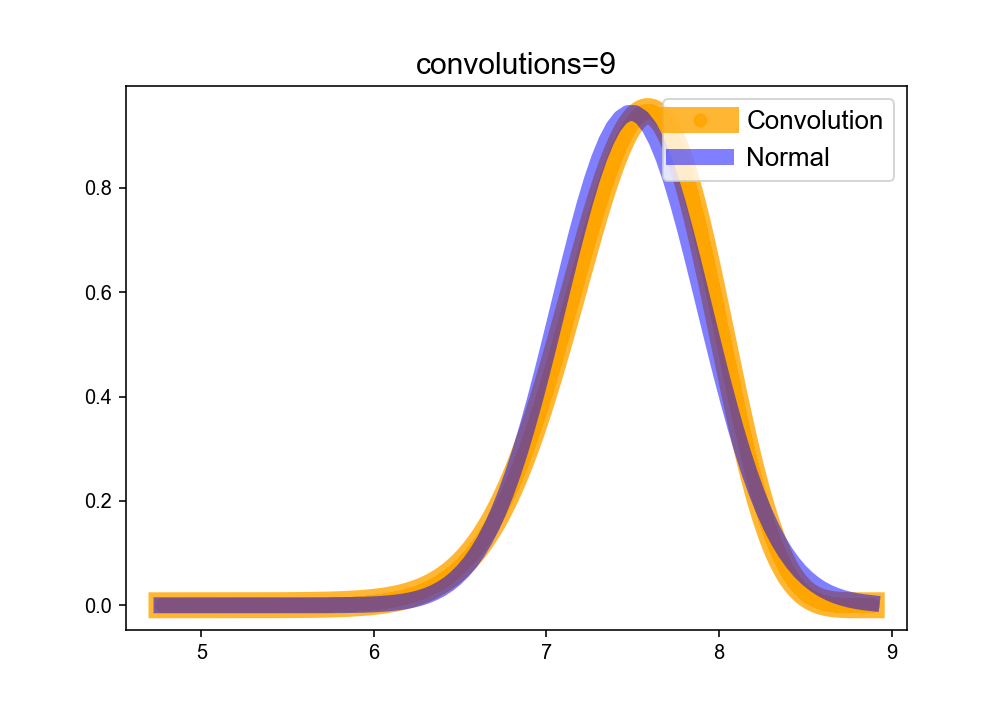

In [25]:
delta = 5e-5
big_grid = np.arange(-50,50,delta)
pmf1 = sp.stats.beta.pdf(big_grid, 5, 1)*delta

figure = plt.figure(figsize=[7,5])
conv_pmf = pmf1

frames = [i for i in range(1,20)] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animateConvolution, frames=frames,interval=310,fargs=(True,True),repeat=False,blit=True)
plt.show()  

- 例子5：bimodal distribution
    - x: uniformly distributed on [0,1], [4,5]

<IPython.core.display.Javascript object>


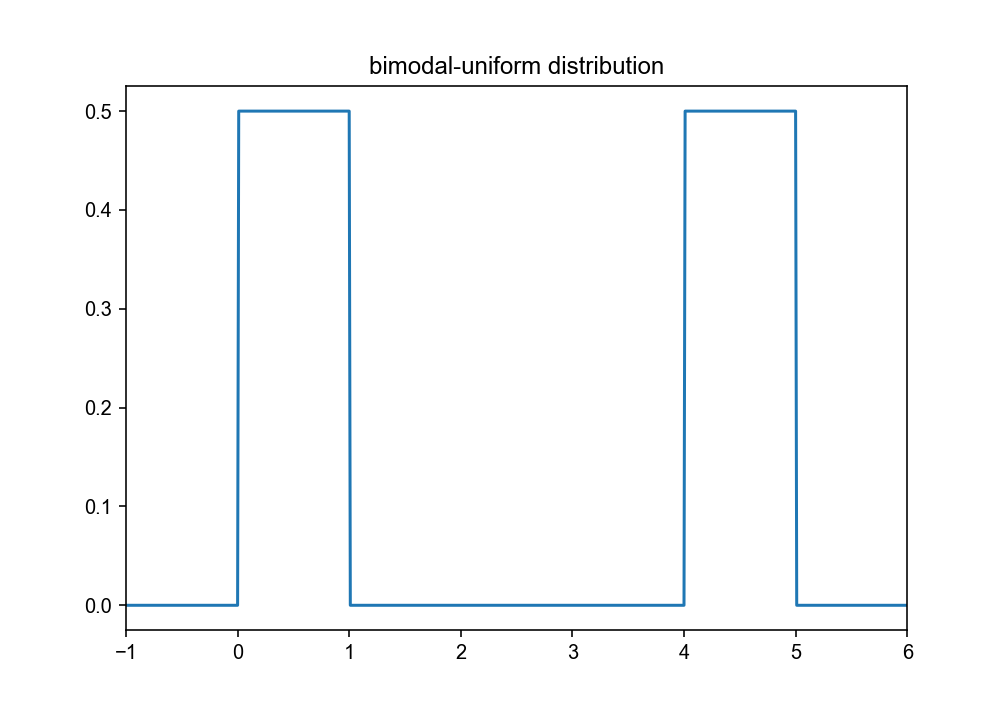

In [26]:
uniform_dist1 = sp.stats.uniform(loc=0, scale=1)
uniform_dist2 = sp.stats.uniform(loc=4, scale=1)
delta = 1e-2
big_grid = np.arange(-200,200,delta)
pmf1 = uniform_dist1.pdf(big_grid)*delta/2 + uniform_dist2.pdf(big_grid)*delta/2


fig = plt.figure(figsize=[7,5])
plt.plot(big_grid,pmf1/delta)
plt.xlim(-1,6)
plt.title("bimodal-uniform distribution")
plt.show()

<IPython.core.display.Javascript object>


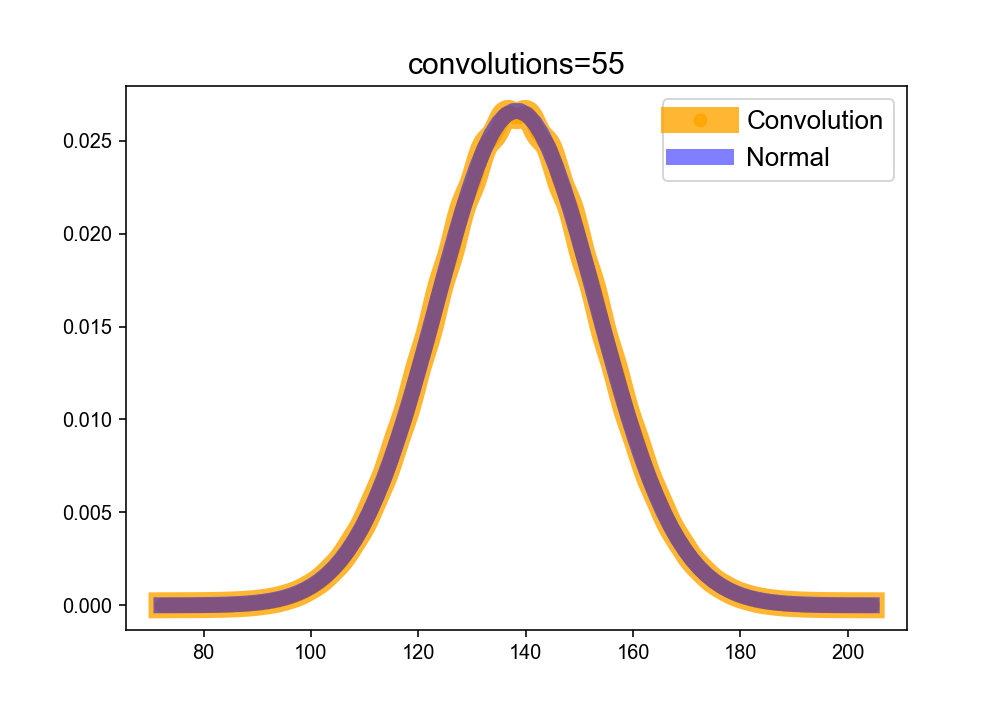

In [27]:
uniform_dist1 = sp.stats.uniform(loc=0, scale=1)
uniform_dist2 = sp.stats.uniform(loc=4, scale=1)
delta = 1e-2
big_grid = np.arange(-250,250,delta)
pmf1 = uniform_dist1.pdf(big_grid)*delta/2 + uniform_dist2.pdf(big_grid)*delta/2

figure = plt.figure(figsize=[7,5])
frames = [i for i in range(1,55)] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animateConvolution, frames=frames,fargs=(True,True,),interval=250,repeat=False,blit=True)
plt.show()

- 例子6: normal distribution 
    - mu = 5, sigma = 5

<IPython.core.display.Javascript object>


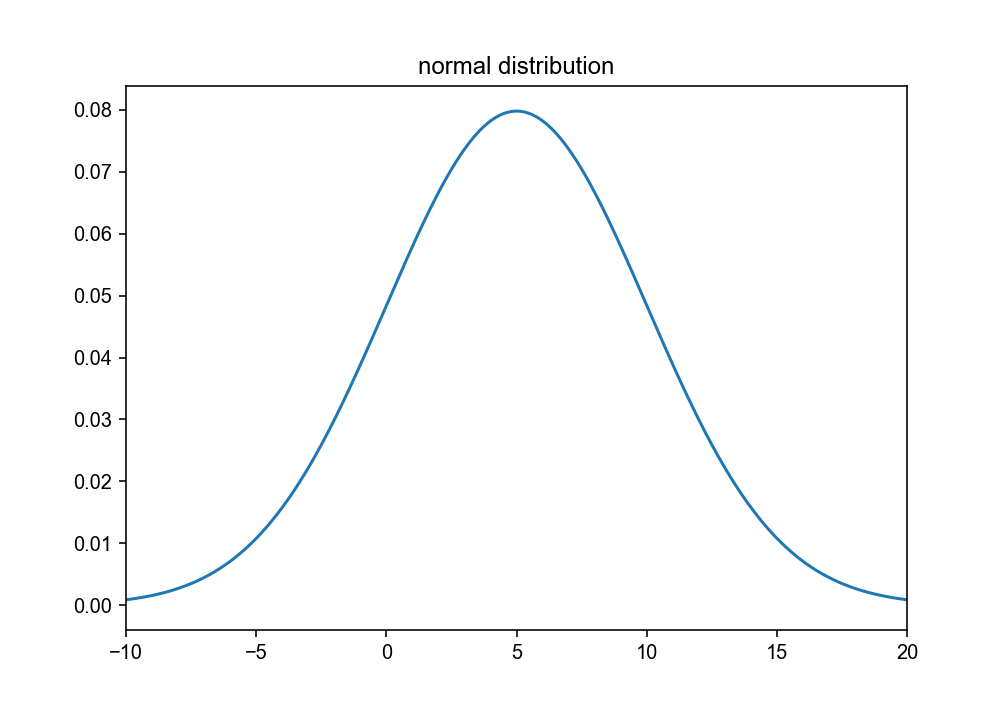

In [28]:
norm_dist = sp.stats.norm(loc=5, scale=5)
delta = 1e-2
big_grid = np.arange(-200,200,delta)
pmf1 = norm_dist.pdf(big_grid)*delta

fig = plt.figure(figsize=[7,5])
plt.plot(big_grid,pmf1/delta)
plt.xlim(-10,20)
plt.title("normal distribution")
plt.show()

<IPython.core.display.Javascript object>


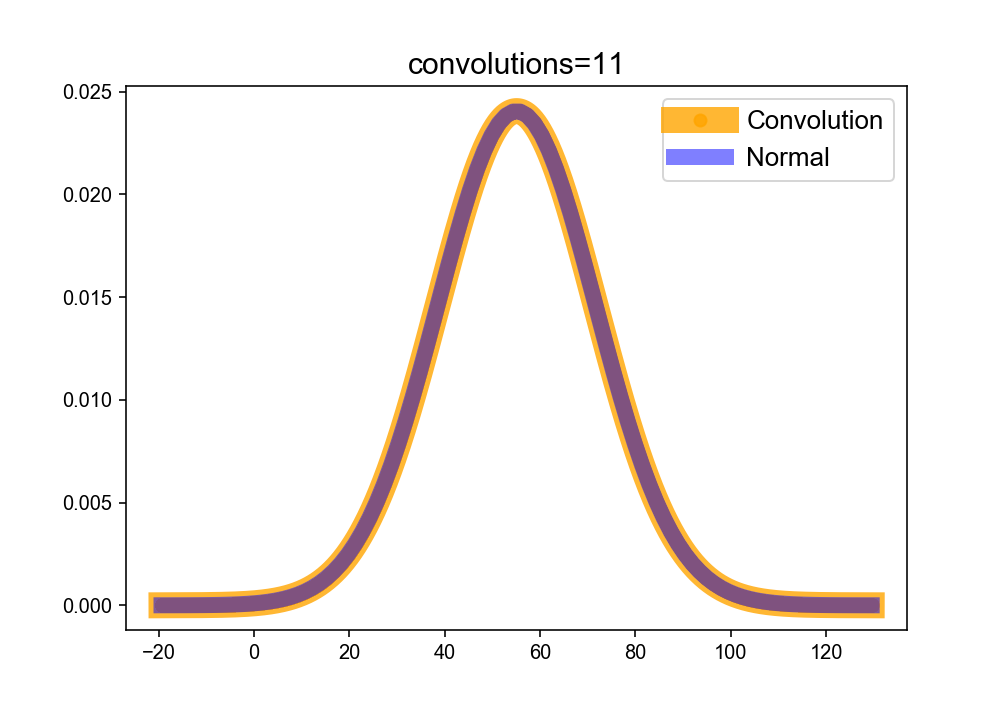

In [29]:
norm_dist = sp.stats.norm(loc=5, scale=5)
delta = 1e-2
big_grid = np.arange(-250,250,delta)
pmf1 = norm_dist.pdf(big_grid)*delta

figure = plt.figure(figsize=[7,5])
frames = [i for i in range(1,20)] #每一帧传入的参数是抽样的samplesize
ani = FuncAnimation(figure, animateConvolution, frames=frames,fargs=(True,True,),interval=350,repeat=False,blit=True)
plt.show()